<a href="https://colab.research.google.com/github/nicol2020/UV-SINTEC/blob/master/310lamp_circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 310lamp
# red, blue, ir , uv light 

-the code was used for making a 3d model of 9tiles, 
- the table below was used for second section of the code, the section which requests from user to write power density in W/m^2 at given height:

LEDs positions:
xlist = [0, -0.005915, 0.004915, -0.005915, 0.004915 ]
ylist = [0, 0.00611, 0.00611, -0.00642, -0.00642]

1(-5.915,6.11 );

2(4.915, 6.11);

UV(0,0);

3(-5.915, -6.42);

4(4.915, -6.42) 

Power density:

**Current 300mA.**

310nm LED - 1.84 W/m^2 at 4cm distance, 60deg angle

430nm LED - 4.98 W/m^2 at 10cm distance, 64deg angle

660nm LED - 3.74 W/m^2 at 10cm distance, 63deg angle 

735nm LED - 0.507 W/m^2 at 15cm distance,65deg angle

**Current 400mA**

430nm LED - 6.55 W/m^2 at 10cm distance, 64deg angle

660nm LED - 4.74 W/m^2 at 10cm distance, 63deg angle

**Current 450mA**

430nm LED - 7.17 W/m^2 at 10cm distance, 64deg angle

660nm LED - 5.54 W/m^2 at 10cm distance, 63deg angle

**Current 500mA**

310nm LED - 3 W/m^2 at 4cm distance, 60deg angle

**Current 600mA**

735nm LED - 2.24 W/m^2 at 10cm distance,65deg angle





In [ ]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d

In [ ]:
###########INITIAL POWER DENSITY############
#Only use code in this cell if given the power density at a given height and need to find the initial intensity I [cd]
I_zero = 3 #Power Density in w/m^2 at a given height h from the LED
h = 0.04 #height from the LED to the plane given for Power density
I = I_zero*(h**2) #Intensity value in cd



In [ ]:
######## NUMBER OF TILES, DISTACNE, HALF ANGLE #################
LED_n = 9 #Number of tiles
z = 0.15 #Distance from LED plane to target plane in metres
hA = 60 #LED half angle in degrees,,,,,,,,,,,, 63deg half angle is written in LED's datasheet 

######TARGET PLANE ########
px = 0.30 #size of plane in x direction (m)
py = 0.30 #size of plane in y direction (m)
num = 100 #Number of points desired in each direction on the plane

#Comment out the next 3 lines and uncomment the line after that in order to use a given I value in cd
#omega = 2*np.pi #solid Angle
#fi = 1 #Flux in watts
#I = fi/omega
#I = 0.0000154 #Initial intensity in cd


In [ ]:
################ LEDs POSITIONS #####################


###saving LEDs positions to xlist and ylist### 
##IMPORTANT- LEDs positions have to be saved to xlist and ylist, #####
####those listS are used in E_total calculation part of code ####
#1(-5.915,6.11 );2(4.915, 6.11);UV(0,0);3(-5.915, -6.42);4(4.915, -6.42) 

#xlist = [0, -0.005915, 0.004915, -0.005915, 0.004915 ]
#ylist = [0, 0.00611, 0.00611, -0.00642, -0.00642]

LED_n = 5 # number of clusters 
radius = 0.10 # radius in m
angle = 360/LED_n # get angle of each section

xlist = [] # list for x coordinates
ylist = [] # list for y coordinates


#get x,y LEDs positions
angle1 = angle
xLED=0 # x cooordinates of LED on tile
yLED=0 # y coordinates of LED on tile
for i in range(LED_n):
  print(angle1)
  xx =  xLED+(radius*np.cos(np.radians(angle1))) # x coordinates
  yy =  yLED+(radius*np.sin(np.radians(angle1))) # y coordinates
  xlist.append(np.round(xx, 4)) # round to 4 decimal and save to list
  ylist.append(np.round(yy ,4)) # round to 4 decimal and save to list
  angle1 = angle1 + angle

"""
xlist_2 = [] # adding a seconde circle of LED
ylist_2 = [] # adding a seconde cirle of LED
xled2=
yled2=
angle2 = angle
for i in range(LED_n):
  print(angle2)
  xx =  xled2+(radius*np.cos(np.radians(angle2))) # x coordinates
  yy =  yled2+(radius*np.sin(np.radians(angle2))) # y coordinates
  xlist_2.append(np.round(xx, 4)) # round to 4 decimal and save to list
  ylist_2.append(np.round(yy ,4)) # round to 4 decimal and save to list
  angle2 = angle2 + angle
print(xlist_2)
print(ylist_2)

xlist.extend(xlist_2)
ylist.extend(ylist_2)  
"""

#printing the LEDs positions, just for checking is every positions calulated correctly
print(f"LEDs X coordinates (x1, x2, x3...) = {xlist}")
print(f"LEDs Y coordinates (y1, y2, y3...) = {ylist}")


################## TARGET PLANE #######################
X = np.outer(1,np.linspace(-px/2,px/2,num)) #Position on plane in x direction
np.round(X,4)                         
Y = np.outer(np.linspace(-py/2,py/2,num),1) #Position on plane in y direction
np.round(Y,4)
x, y = np.meshgrid(X,Y) #This is required to enable the contour plot

################## E_total CALCULATION #######################################
E = 0 #Set total illuminance to 0 initially
Enew = 0 #Set storage variable to zero initially to 0 initially
p = -(np.log(2)/np.log(np.cos(np.radians(hA))) )

for ledx,ledy in zip(xlist,ylist): #Outer loop to change the y position of the leds for each row of x positions
    Enew = E #Store the total illuminance from previous iteration
    opp = np.sqrt((x-ledx)**2+(y-ledy)**2) #Calculating the parallel distance from the LED to the point on the plane
    hyp = np.sqrt(z**2 + opp**2) #Calculating the straight line distance from the LED to the point on the plane
    En = ((z**(p+1))*I ) / ((hyp**2)**((p+3)/2)) #Calculating illuminance of each LED for each point on the plane in W/m^2
    E = En + Enew #Adding illuminance from current iteration to total

#################################################

## Printing max power density, min power denstiy, uniformity##########
M = np.max(E) #Peak of the matrix E
print(f"MAx power density in target plane: {np.max(E)}, W/m2")
print(f"Min power density in target plane: {np.min(E)}, W/m2")
print(f"Uniformity: {np.min(E)/np.max(E)}")
#E = E/M #Creating relative illuminance with respect to the peak of E

LEDs X coordinates (x1, x2, x3...) = [0.17, 0, 0.17, -0.17, -0.17, 0.17, 0, -0.17]
LEDs Y coordinates (y1, y2, y3...) = [0.17, 0.17, 0, 0.17, 0, -0.17, -0.17, -0.17]
MAx power density in target plane: 0.34203020240159326, W/m2
Min power density in target plane: 0.23054049046155023, W/m2
Uniformity: 0.6740354765245617


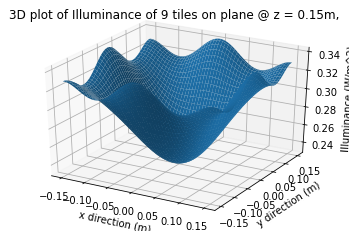

In [ ]:
#Ben's code, changed only the set_title
#Code to create a 3D plot of 2D position on the plane and total illuminance
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.plot_surface(x,y,E)
ax.set_title(f"3D plot of Illuminance of {LED_n} tiles on plane @ z = {z}m,")
ax.set_xlabel("x direction (m)")
ax.set_ylabel("y direction (m)")
ax.set_zlabel("Illuminance (W/m^2)")
plt.show()

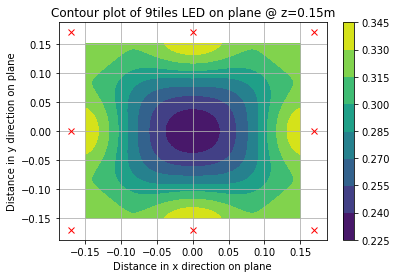

In [ ]:
#Ben's code

fig,ax = plt.subplots(1,1)
#V = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1] #Line for putting specific contour lines in the plot
#V = [0.9, 0.93, 0.95, 0.98, 1]
V = [0.90*M,0.95*M, 0.98*M, M] #Array for making specific contour lines for illuminance in W/m^2
cp = ax.contourf(x,y,E)
#Code below for plotting each LED's position

for ledx, ledy in zip(xlist,ylist):
  plt.plot(ledx,ledy,'rx')


fig.colorbar(cp)
plt.title(f"Contour plot of {LED_n}tiles LED on plane @ z={z}m")
plt.xlabel("Distance in x direction on plane")
plt.ylabel("Distance in y direction on plane")
plt.grid()